# **Breast Cancer Prediction**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Reading the dataset

In [2]:
df = pd.read_csv("data.csv", header=0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Analysis

In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

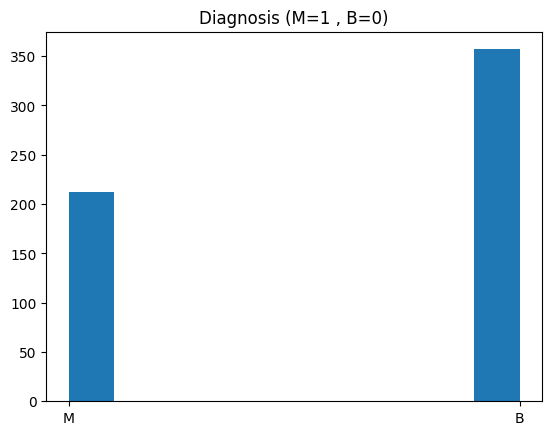

In [8]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [9]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Performance Functions

In [11]:
def plot_confusion_matrix(y_true, predictions, model_name):
    cm = confusion_matrix(y_true, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

In [12]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Feature Extraction

In [13]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

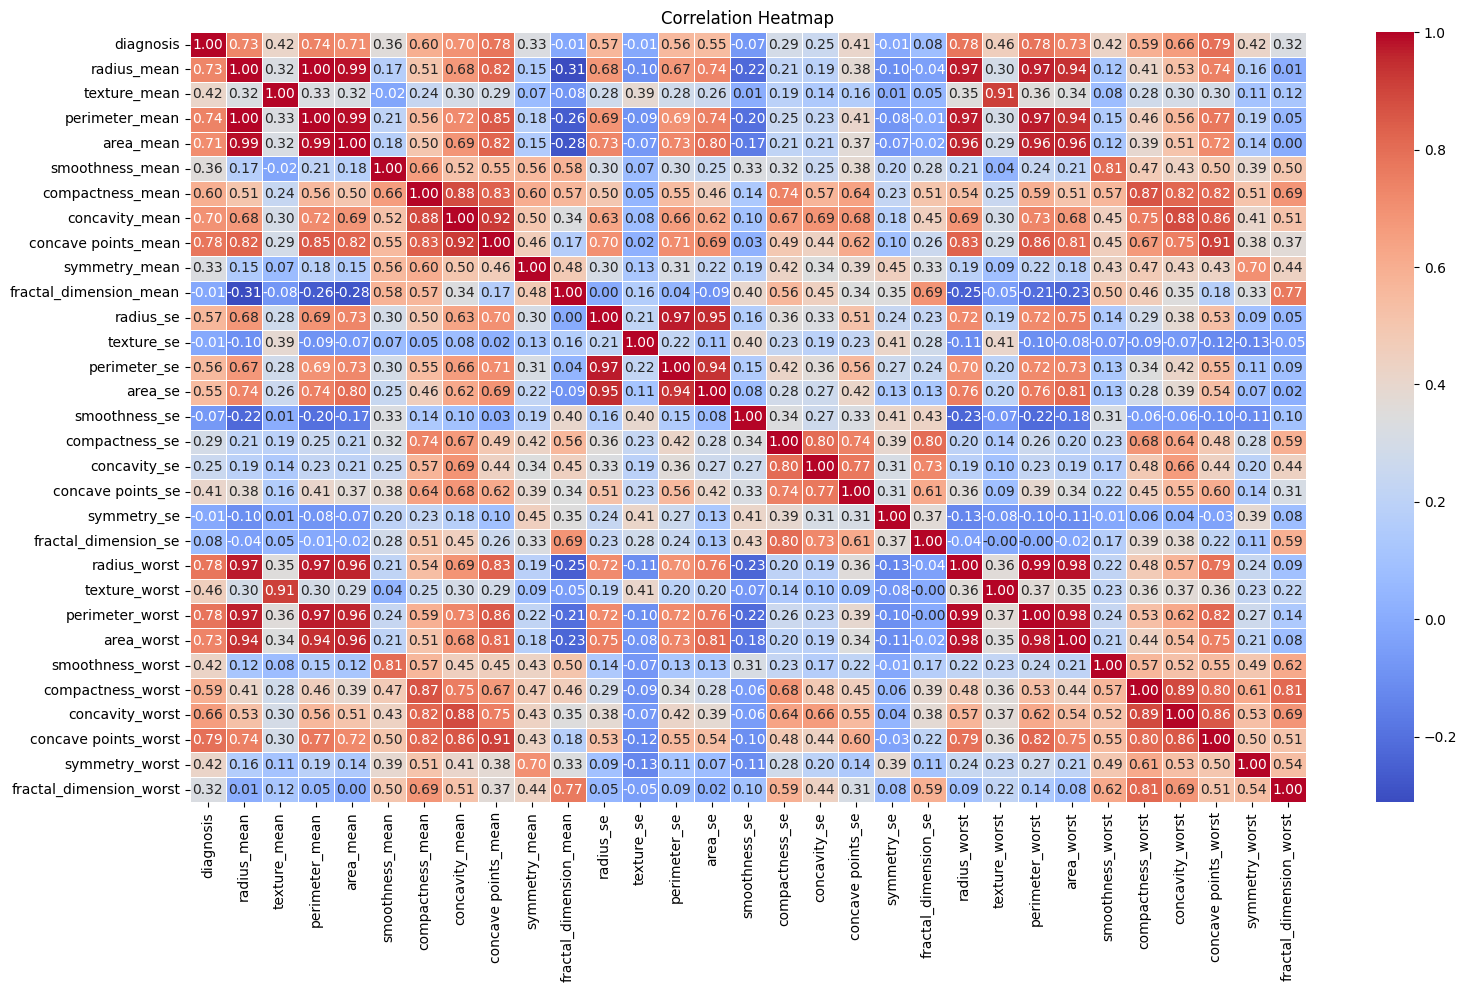

In [14]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["diagnosis"].abs().sort_values(ascending=False)
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
top_correlated_features = correlation_with_target.head(5)
print("Top 5 Correlated Features:")
print(top_correlated_features)

Top 5 Correlated Features:
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
Name: diagnosis, dtype: float64


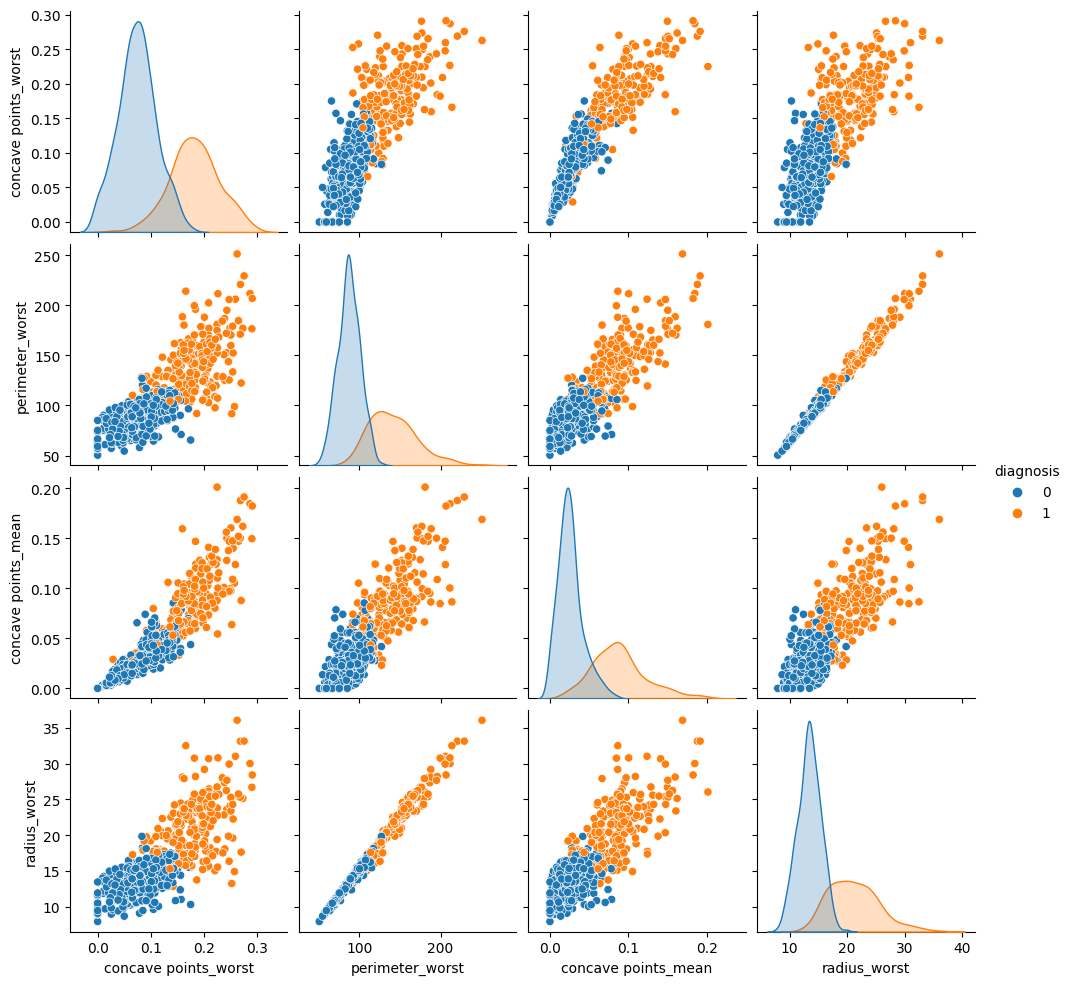

In [16]:
sns.pairplot(df,hue='diagnosis', vars=['concave points_worst','perimeter_worst','concave points_mean','radius_worst'  ])

## Normalization

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machines": SVC(probability=True),
    "Neural Networks": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
}

## Training and Testing

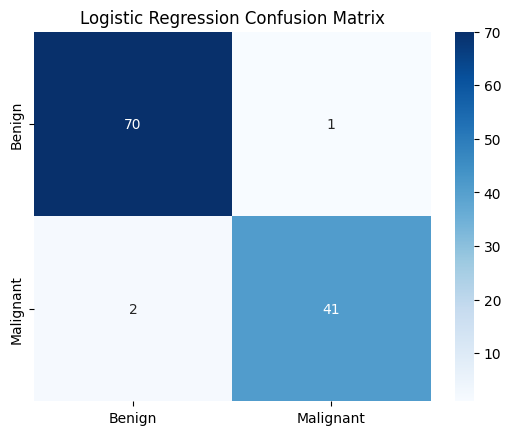

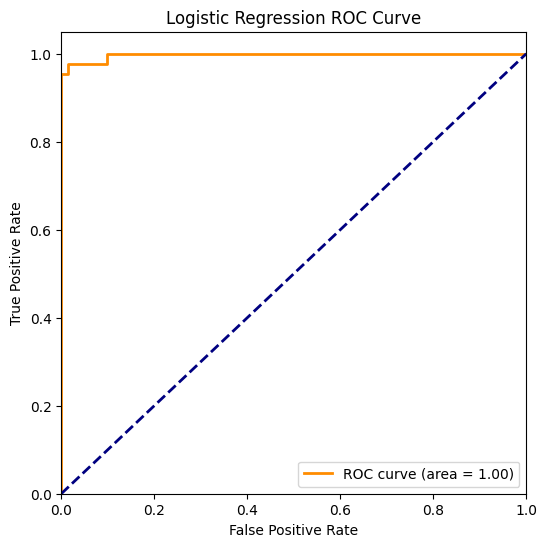

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Logistic Regression Accuracy: 0.9737



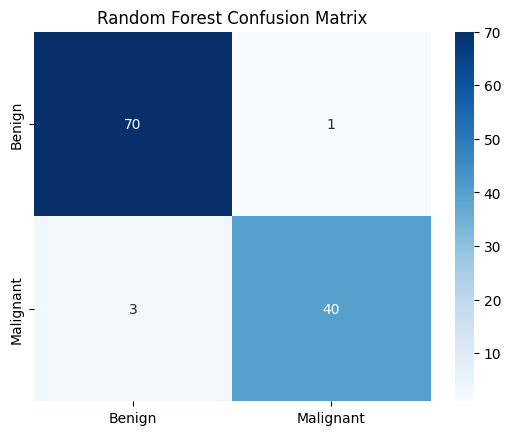

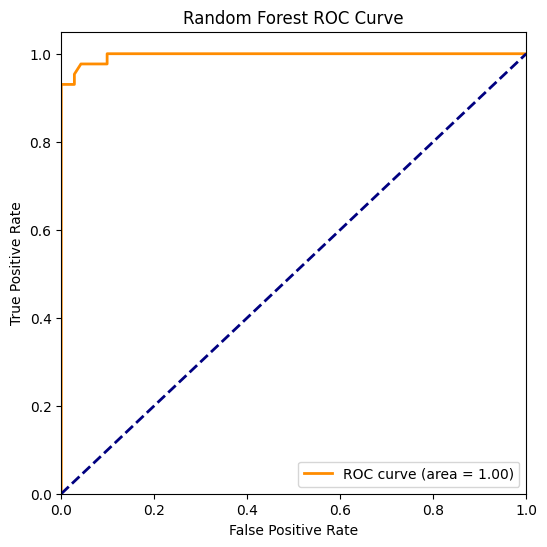

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Random Forest Accuracy: 0.9649



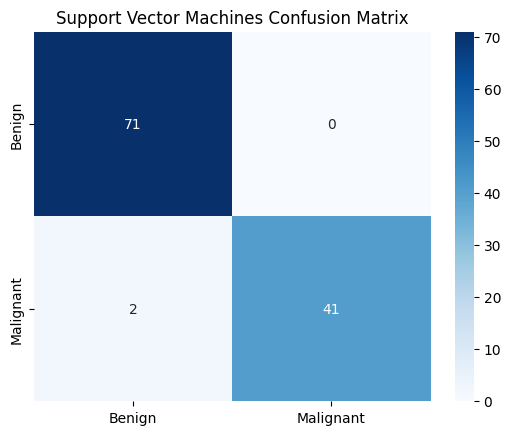

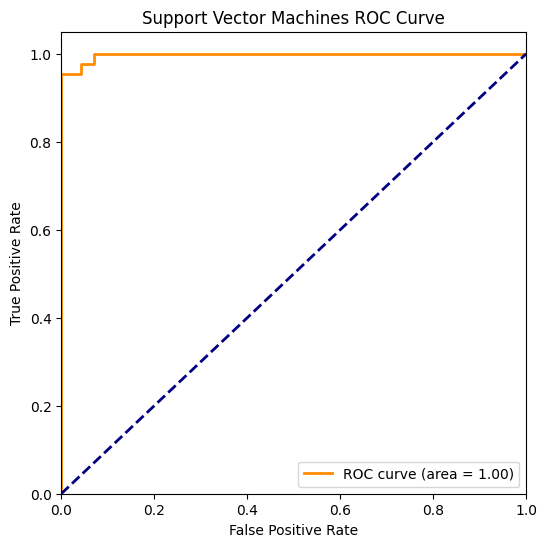

Support Vector Machines Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Support Vector Machines Accuracy: 0.9825



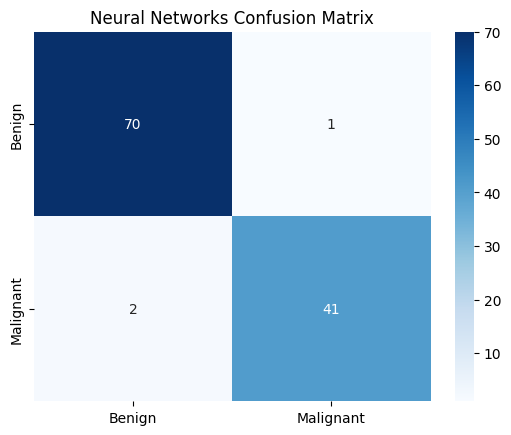

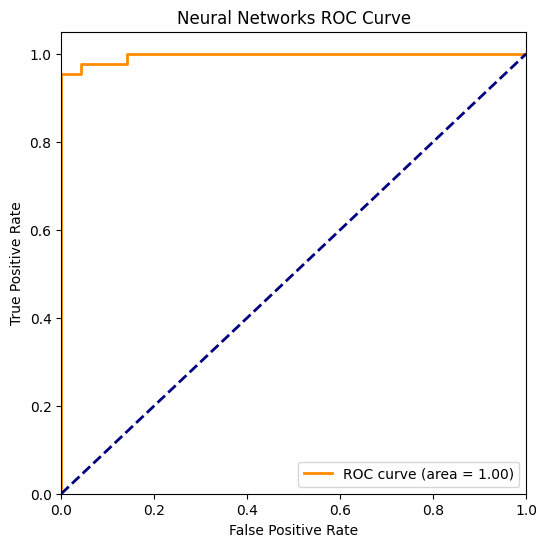

Neural Networks Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Neural Networks Accuracy: 0.9737



In [19]:
model_accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    if model_name == "Neural Networks (Deep Learning)":
        predictions = (predictions > 0.5).astype(int)

    plot_confusion_matrix(y_test, predictions, model_name)

    plot_roc_curve(model, X_test, y_test, model_name)

    report = classification_report(y_test, predictions)
    print(f"{model_name} Classification Report:\n{report}\n")

    accuracy = accuracy_score(y_test, predictions)
    model_accuracies.append((model_name, accuracy))
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")

In [20]:
selected_models = list(models.keys())
accuracies = []

## Model Performance Comparisons

In [21]:
for model_name in selected_models:
    model = models[model_name]
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

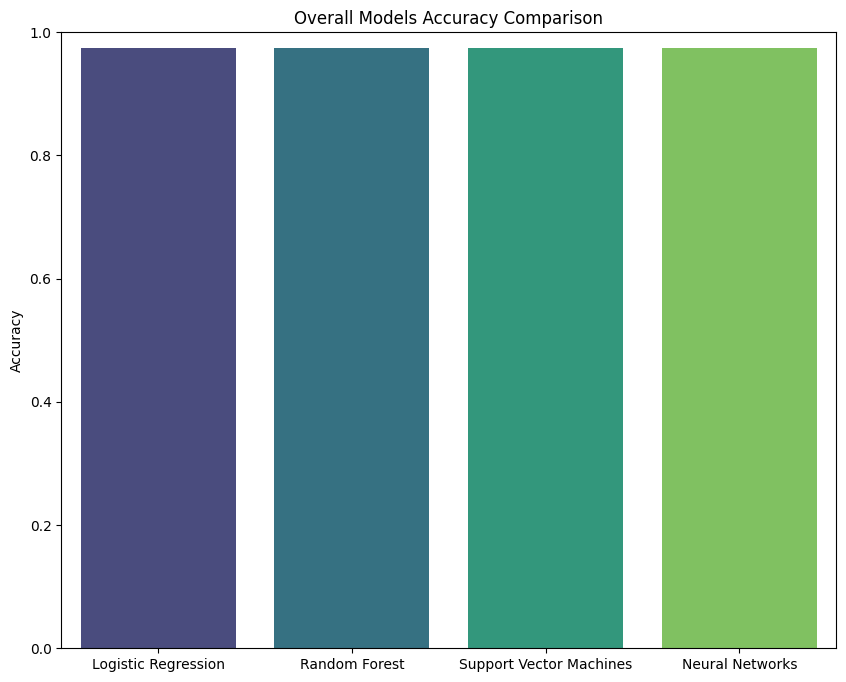

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x=selected_models, y=accuracies, palette="viridis")
plt.title("Overall Models Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

In [23]:
print("All Model Accuracies:")
for model_name, accuracy in model_accuracies:
    print(f"{model_name} Accuracy: {accuracy:.4f}")

best_model, best_accuracy = max(model_accuracies, key=lambda x: x[1])
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy:.4f}")

All Model Accuracies:
Logistic Regression Accuracy: 0.9737
Random Forest Accuracy: 0.9649
Support Vector Machines Accuracy: 0.9825
Neural Networks Accuracy: 0.9737

Best Model: Support Vector Machines with Accuracy: 0.9825


## Other SVM Models

In [24]:
from sklearn.metrics import accuracy_score
def print_accuracy(model, X_train, y_train, X_test, y_test, model_name):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"{model_name} Accuracy - Train: {train_accuracy:.4f}")
    print(f"{model_name} Accuracy - Test: {test_accuracy:.4f}\n")

In [25]:
linear_svm_model = SVC(kernel='linear', probability=True)
linear_svm_model.fit(X_train, y_train)

print_accuracy(linear_svm_model, X_train, y_train, X_test, y_test, "Linear Kernel SVM")

poly_svm_model = SVC(kernel='poly', degree=2, gamma='auto', probability=True)
poly_svm_model.fit(X_train, y_train)

print_accuracy(poly_svm_model, X_train, y_train, X_test, y_test, "Polynomial Kernel SVM")

rbf_svm_model = SVC(kernel='rbf', gamma=1, probability=True)
rbf_svm_model.fit(X_train, y_train)

print_accuracy(rbf_svm_model, X_train, y_train, X_test, y_test, "Radial Kernel SVM")

Linear Kernel SVM Accuracy - Train: 0.9868
Linear Kernel SVM Accuracy - Test: 0.9561

Polynomial Kernel SVM Accuracy - Train: 0.8659
Polynomial Kernel SVM Accuracy - Test: 0.8070

Radial Kernel SVM Accuracy - Train: 1.0000
Radial Kernel SVM Accuracy - Test: 0.6316

